### Gaussian Transformation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
dataset=pd.read_csv('Titanic_train.csv',usecols=['Age','Fare','Survived'])

In [5]:
dataset.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
dataset.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
# For understanding the concept 
dataset['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    15.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [13]:
dataset['Age'].isnull().sum()

0

In [14]:
#Selects a random observation(row) from the age column each time of execution 
dataset['Age'].sample()

282    16.0
Name: Age, dtype: float64

In [15]:
dataset['Age'].sample()

860    41.0
Name: Age, dtype: float64

In [18]:
# Now the selected data will remain same each time
dataset['Age'].sample(random_state=0)

495    24.0
Name: Age, dtype: float64

In [19]:
dataset['Age'].sample(random_state=0)

495    24.0
Name: Age, dtype: float64

In [21]:
random_values=dataset['Age'].dropna().sample(dataset['Age'].isnull().sum(),random_state=0)

In [22]:
random_values

Series([], Name: Age, dtype: float64)

In [7]:
# Function to fill nan values with random sampling
def impute_nan_values(dataset,feature):
    
    copied_dataset=dataset.copy()
    
    #creating a new feature  featurename_random
    copied_dataset[feature+'_random']=copied_dataset[feature]
    
    #now extracting the random samples to fill the nan values from dataset after droping all nan values
    random_values=copied_dataset[feature].dropna().sample(copied_dataset[feature].isnull().sum(),random_state=0)
    
    #our missing values obsevation(row) index and should match with random_values index to merge the dataset
    random_values.index=copied_dataset[copied_dataset[feature].isnull()].index
    
    #putting down the random_values to the location where data is missing in feature_random column of copied_dataset
    copied_dataset.loc[copied_dataset[feature].isnull(),feature+'_random']=random_values
    
    return copied_dataset[feature+'_random']

In [8]:
dataset['Age']=impute_nan_values(dataset,'Age')

In [10]:
dataset.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
dataset.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
# Now There is no more  nan values in the dataset

In [29]:
import scipy.stats as stats

### Q-Q plot

In [30]:
# Creating a function which will help us to plot two plots side by side using subplots

def my_plots(dataset,feature):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    dataset[feature].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(dataset[feature],dist='norm',plot=plt)
    
    plt.show()

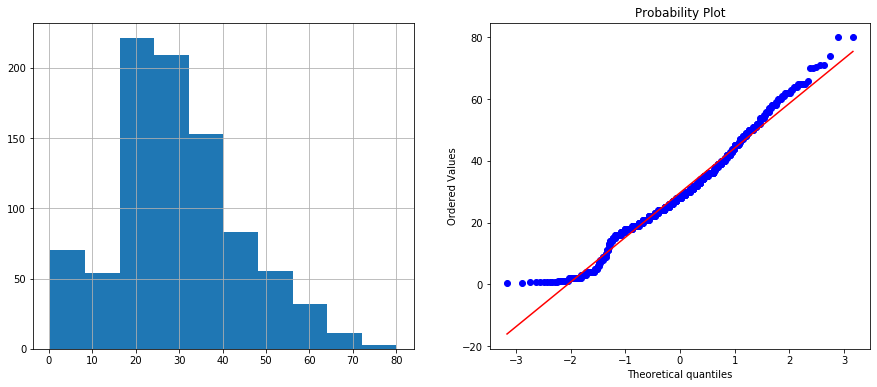

In [31]:
my_plots(dataset,'Age')

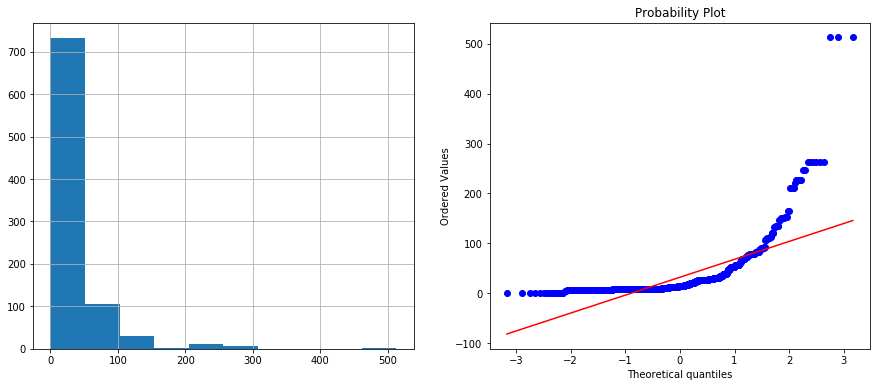

In [33]:
my_plots(dataset,'Fare')

#### Logarithamic Transformation

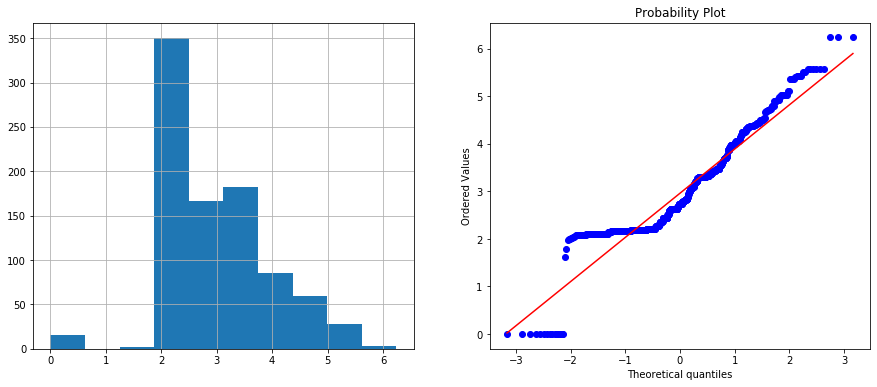

In [34]:
dataset['Fare']=np.log(dataset['Fare']+1)
my_plots(dataset,'Fare')

#### Reciprocal Transfromation

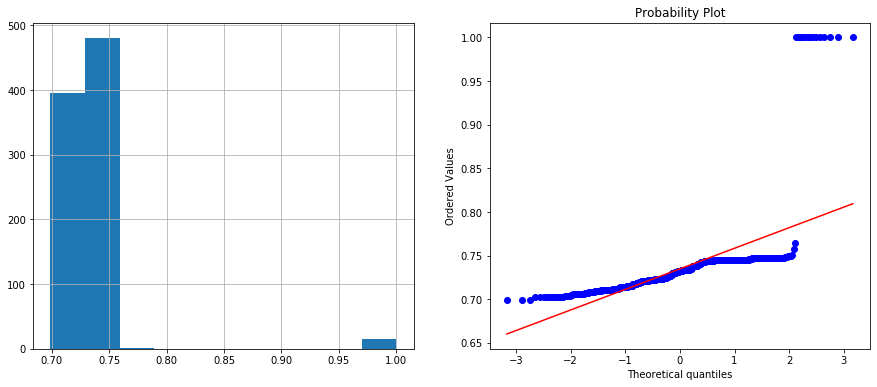

In [43]:
dataset['reci_Fare']=1/(dataset['Fare']+1)
my_plots(dataset,'reci_Fare')

#### Square root transformation

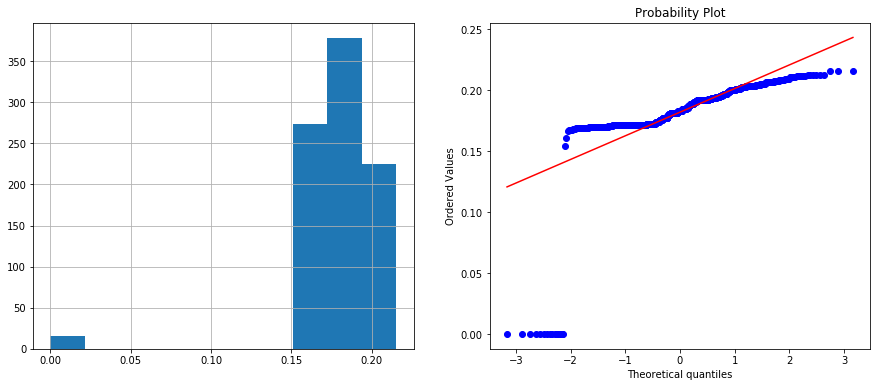

In [42]:
dataset['square_Fare']=dataset['Fare']**1/2
my_plots(dataset,'square_Fare')

#### Exponential Tranformation

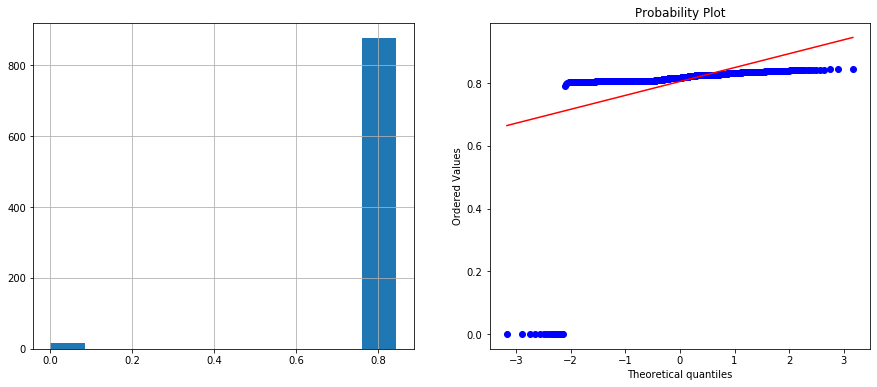

In [46]:
dataset['expo_Fare']=dataset['Fare']**(1/5)
my_plots(dataset,'expo_Fare')

#### Box Cox

Optimal lambda:  14.284120667059272


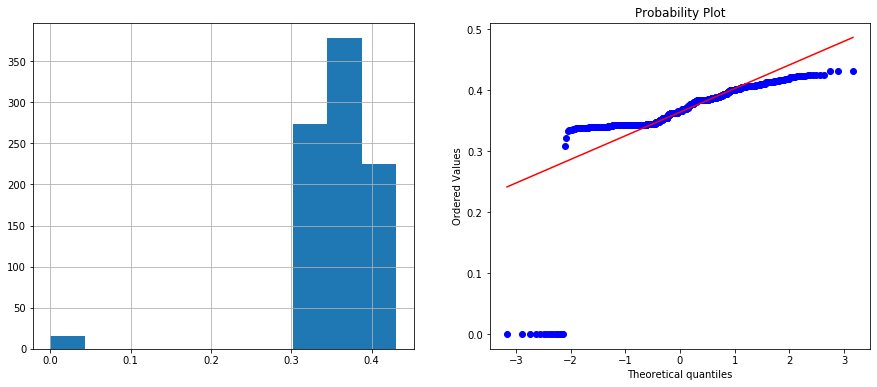

In [47]:
dataset['boxcox_fare'],params=stats.boxcox(dataset['Fare']+1)
print('Optimal lambda: ', params)

my_plots(dataset,'Fare')


#### compare to all other feature logrithamic feature has done the better job to convert the fare into gaussian distribution